In [1]:
from spotipy.oauth2 import SpotifyOAuth
import spotipy
import pandas as pd
# from matplotlib import pyplot as plt
# import seaborn as sns
# import scipy

In [1]:
 # Spotify Credentials
client_id = "enter_client_id_here"
client_secret = "enter_client_secret_here"
redirect_uri = "name_you_choose_goes_here:/callback/"

In [3]:
# Connect with API Keys 
scope = "user-read-recently-played"
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope,
                                               client_id=client_id,
                                              client_secret=client_secret,
                                              redirect_uri=redirect_uri))

In [4]:
# Set spotify artist code
# You can obtain this from spotify.com by going to the artist page and taking the artist ID from the URL
# Example: For URL of the Radiohead page ( https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb ) 
# the artist ID is 4Z8W4fKeB5YxbusRsdQVPb
radiohead = sp.artist("4Z8W4fKeB5YxbusRsdQVPb")

In [6]:
# Verifying that it pulls up content for radiohead
radiohead

{'external_urls': {'spotify': 'https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb'},
 'followers': {'href': None, 'total': 7540760},
 'genres': ['alternative rock',
  'art rock',
  'melancholia',
  'oxford indie',
  'permanent wave',
  'rock'],
 'href': 'https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb',
 'id': '4Z8W4fKeB5YxbusRsdQVPb',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eba03696716c9ee605006047fd',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab67616100005174a03696716c9ee605006047fd',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f178a03696716c9ee605006047fd',
   'width': 160}],
 'name': 'Radiohead',
 'popularity': 78,
 'type': 'artist',
 'uri': 'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb'}

In [13]:
radiohead_albums = sp.artist_albums(radiohead['id'])

In [14]:
radiohead_albums

{'href': 'https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb/albums?offset=0&limit=20&include_groups=album,single,compilation,appears_on',
 'items': [{'album_group': 'album',
   'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4Z8W4fKeB5YxbusRsdQVPb'},
     'href': 'https://api.spotify.com/v1/artists/4Z8W4fKeB5YxbusRsdQVPb',
     'id': '4Z8W4fKeB5YxbusRsdQVPb',
     'name': 'Radiohead',
     'type': 'artist',
     'uri': 'spotify:artist:4Z8W4fKeB5YxbusRsdQVPb'}],
   'available_markets': ['AD',
    'AE',
    'AG',
    'AL',
    'AM',
    'AO',
    'AR',
    'AT',
    'AU',
    'AZ',
    'BA',
    'BB',
    'BD',
    'BE',
    'BF',
    'BG',
    'BH',
    'BI',
    'BJ',
    'BN',
    'BO',
    'BR',
    'BS',
    'BT',
    'BW',
    'BY',
    'BZ',
    'CA',
    'CD',
    'CG',
    'CH',
    'CI',
    'CL',
    'CM',
    'CO',
    'CR',
    'CV',
    'CW',
    'CY',
    'CZ',
    'DE',
    'DJ',
    'DK',
    'DM',
    'DO',
  

In [16]:
for album in radiohead_albums['items']:
    print(f"Album: {album['name']} -- ID: {album['id']}")

Album: KID A MNESIA -- ID: 6ofEQubaL265rIW6WnCU8y
Album: OK Computer OKNOTOK 1997 2017 -- ID: 0tzfI6NFJqcJkWb23R3lRZ
Album: A Moon Shaped Pool -- ID: 2ix8vWvvSp2Yo7rKMiWpkg
Album: TKOL RMX 1234567 -- ID: 566osTxDsfrtdBxPDMGufx
Album: The King Of Limbs -- ID: 3P17levwUPzmFfLYdAK3A7
Album: In Rainbows -- ID: 5vkqYmiPBYLaalcmjujWxK
Album: In Rainbows (Disk 2) -- ID: 6zTAW5oRuOmxJuUHhcQope
Album: Hail To the Thief -- ID: 5mzoI3VH0ZWk1pLFR6RoYy
Album: I Might Be Wrong -- ID: 1vdQ5t7iO2gC3OX7j2GFCt
Album: Amnesiac -- ID: 1HrMmB5useeZ0F5lHrMvl0
Album: Kid A -- ID: 6GjwtEZcfenmOf6l18N7T7
Album: OK Computer -- ID: 6dVIqQ8qmQ5GBnJ9shOYGE
Album: The Bends -- ID: 35UJLpClj5EDrhpNIi4DFg
Album: Pablo Honey -- ID: 3gBVdu4a1MMJVMy6vwPEb8
Album: Follow Me Around -- ID: 2vTAZfcTyauC6ZG29d6yB5
Album: If You Say the Word -- ID: 0SvYW67Kes52rOZziDO9uC
Album: Supercollider / The Butcher -- ID: 1EPzf6NnFz2eoixDxTOMbg
Album: Harry Patch (In Memory Of) -- ID: 03JVw3rc0k5AbGVIIFGtGe
Album: Spectre -- ID: 7kbhOO

In [17]:
album_names = []
albums = []

for album in radiohead_albums['items']:
    album_name = album['name']
    album_id = album['id']
    # Cleaning some duplicates
    if album_name[:3] not in album_names and "remix" not in album_name and "Karaoke" not in album_name and "Live" not in album_name:
        album_names.append(album_name[:3] )
        albums.append((album_name,album_id))

In [18]:
albums

[('KID A MNESIA', '6ofEQubaL265rIW6WnCU8y'),
 ('OK Computer OKNOTOK 1997 2017', '0tzfI6NFJqcJkWb23R3lRZ'),
 ('A Moon Shaped Pool', '2ix8vWvvSp2Yo7rKMiWpkg'),
 ('TKOL RMX 1234567', '566osTxDsfrtdBxPDMGufx'),
 ('The King Of Limbs', '3P17levwUPzmFfLYdAK3A7'),
 ('In Rainbows', '5vkqYmiPBYLaalcmjujWxK'),
 ('Hail To the Thief', '5mzoI3VH0ZWk1pLFR6RoYy'),
 ('I Might Be Wrong', '1vdQ5t7iO2gC3OX7j2GFCt'),
 ('Amnesiac', '1HrMmB5useeZ0F5lHrMvl0'),
 ('Kid A', '6GjwtEZcfenmOf6l18N7T7'),
 ('Pablo Honey', '3gBVdu4a1MMJVMy6vwPEb8'),
 ('Follow Me Around', '2vTAZfcTyauC6ZG29d6yB5'),
 ('If You Say the Word', '0SvYW67Kes52rOZziDO9uC'),
 ('Supercollider / The Butcher', '1EPzf6NnFz2eoixDxTOMbg'),
 ('Harry Patch (In Memory Of)', '03JVw3rc0k5AbGVIIFGtGe'),
 ('Spectre', '7kbhOOk0mAzdy3NukjeoXF'),
 ('Daydreaming', '27Q0co2HcWQHrXffvt2GkI')]

## We need to prune some of these albums as they include some special additions and remixes. 
I only want to include the main eight studio albums in this analysis

In [57]:
final_album_list = albums[:-6]

In [58]:
final_album_list

[('KID A MNESIA', '6ofEQubaL265rIW6WnCU8y'),
 ('OK Computer OKNOTOK 1997 2017', '0tzfI6NFJqcJkWb23R3lRZ'),
 ('A Moon Shaped Pool', '2ix8vWvvSp2Yo7rKMiWpkg'),
 ('TKOL RMX 1234567', '566osTxDsfrtdBxPDMGufx'),
 ('The King Of Limbs', '3P17levwUPzmFfLYdAK3A7'),
 ('In Rainbows', '5vkqYmiPBYLaalcmjujWxK'),
 ('Hail To the Thief', '5mzoI3VH0ZWk1pLFR6RoYy'),
 ('I Might Be Wrong', '1vdQ5t7iO2gC3OX7j2GFCt'),
 ('Amnesiac', '1HrMmB5useeZ0F5lHrMvl0'),
 ('Kid A', '6GjwtEZcfenmOf6l18N7T7'),
 ('Pablo Honey', '3gBVdu4a1MMJVMy6vwPEb8')]

In [66]:
final_album_list.remove(('KID A MNESIA', '6ofEQubaL265rIW6WnCU8y'))

In [67]:
final_album_list.remove(('TKOL RMX 1234567', '566osTxDsfrtdBxPDMGufx'))

In [68]:
final_album_list.remove(('I Might Be Wrong', '1vdQ5t7iO2gC3OX7j2GFCt'))

In [69]:
final_album_list

[('OK Computer OKNOTOK 1997 2017', '0tzfI6NFJqcJkWb23R3lRZ'),
 ('A Moon Shaped Pool', '2ix8vWvvSp2Yo7rKMiWpkg'),
 ('The King Of Limbs', '3P17levwUPzmFfLYdAK3A7'),
 ('In Rainbows', '5vkqYmiPBYLaalcmjujWxK'),
 ('Hail To the Thief', '5mzoI3VH0ZWk1pLFR6RoYy'),
 ('Amnesiac', '1HrMmB5useeZ0F5lHrMvl0'),
 ('Kid A', '6GjwtEZcfenmOf6l18N7T7'),
 ('Pablo Honey', '3gBVdu4a1MMJVMy6vwPEb8')]

In [70]:
radiohead_song_ids = []

for album_name, album_id in final_album_list:
    tracks = sp.album_tracks(album_id)['items']
    for track in tracks:
        track_name = track['name']
        track_id = track['id']
        radiohead_song_ids.append((album_name,album_id,track_name,track_id))

In [71]:
radiohead_song_ids[0]

('OK Computer OKNOTOK 1997 2017',
 '0tzfI6NFJqcJkWb23R3lRZ',
 'Airbag - Remastered',
 '4qOeFiO7BASXEiQ23BLrYy')

In [72]:
radiohead_song_ids

[('OK Computer OKNOTOK 1997 2017',
  '0tzfI6NFJqcJkWb23R3lRZ',
  'Airbag - Remastered',
  '4qOeFiO7BASXEiQ23BLrYy'),
 ('OK Computer OKNOTOK 1997 2017',
  '0tzfI6NFJqcJkWb23R3lRZ',
  'Paranoid Android - Remastered',
  '2fCSulwhjYvNxKbh67d4Pd'),
 ('OK Computer OKNOTOK 1997 2017',
  '0tzfI6NFJqcJkWb23R3lRZ',
  'Subterranean Homesick Alien - Remastered',
  '0vgSQrQMEoa6VecE9Y5Dnk'),
 ('OK Computer OKNOTOK 1997 2017',
  '0tzfI6NFJqcJkWb23R3lRZ',
  'Exit Music (For A Film) - Remastered',
  '7IjGG1fEIbM6EjlyfYwqni'),
 ('OK Computer OKNOTOK 1997 2017',
  '0tzfI6NFJqcJkWb23R3lRZ',
  'Let Down - Remastered',
  '1CeC8kOYxUTCC2wHGtWROD'),
 ('OK Computer OKNOTOK 1997 2017',
  '0tzfI6NFJqcJkWb23R3lRZ',
  'Karma Police - Remastered',
  '70VjECXPkO7APS1bAj4wEN'),
 ('OK Computer OKNOTOK 1997 2017',
  '0tzfI6NFJqcJkWb23R3lRZ',
  'Fitter Happier - Remastered',
  '7nD7b2mbbZuDdwW03rLj3f'),
 ('OK Computer OKNOTOK 1997 2017',
  '0tzfI6NFJqcJkWb23R3lRZ',
  'Electioneering - Remastered',
  '1p7qydHaybttxuW0vX

In [73]:
len(radiohead_song_ids)

100

# Song Features
Spotify has machine generated features for songs we can leverage.

In [74]:
# Test on one song
paranoid_android_features = sp.audio_features(tracks=['2fCSulwhjYvNxKbh67d4Pd'])

In [75]:
paranoid_android_features

[{'danceability': 0.332,
  'energy': 0.826,
  'key': 2,
  'loudness': -7.269,
  'mode': 0,
  'speechiness': 0.0497,
  'acousticness': 0.0275,
  'instrumentalness': 0.00848,
  'liveness': 0.234,
  'valence': 0.216,
  'tempo': 125.621,
  'type': 'audio_features',
  'id': '2fCSulwhjYvNxKbh67d4Pd',
  'uri': 'spotify:track:2fCSulwhjYvNxKbh67d4Pd',
  'track_href': 'https://api.spotify.com/v1/tracks/2fCSulwhjYvNxKbh67d4Pd',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2fCSulwhjYvNxKbh67d4Pd',
  'duration_ms': 383973,
  'time_signature': 4}]

In [76]:
pd.Series(paranoid_android_features[0])

danceability                                                    0.332
energy                                                          0.826
key                                                                 2
loudness                                                       -7.269
mode                                                                0
speechiness                                                    0.0497
acousticness                                                   0.0275
instrumentalness                                              0.00848
liveness                                                        0.234
valence                                                         0.216
tempo                                                         125.621
type                                                   audio_features
id                                             2fCSulwhjYvNxKbh67d4Pd
uri                              spotify:track:2fCSulwhjYvNxKbh67d4Pd
track_href          

### Creating a pandas DataFrame to work with

In [77]:
df = pd.DataFrame()

# Takes a while due to batching
for album_name,album_id,track_name, track_id in radiohead_song_ids:
    features = sp.audio_features(tracks=[track_id])[0]
    features['album_name'] = album_name
    features['album_id'] = album_id
    features['track_name'] = track_name
    ser = pd.Series(features)
    df = pd.concat([df,ser],axis=1)

In [78]:
# Tranpose to fix concat issue due to axis=1
df = df.transpose().set_index('id')
df.head()[['danceability', 'energy', 'key', 'acousticness','album_name','track_name']]

,danceability,energy,key,acousticness,album_name,track_name
id,,,,,,
4qOeFiO7BASXEiQ23BLrYy,0.142,0.935,2,0.00989,OK Computer OKNOTOK 1997 2017,Airbag - Remastered
2fCSulwhjYvNxKbh67d4Pd,0.332,0.826,2,0.0275,OK Computer OKNOTOK 1997 2017,Paranoid Android - Remastered
0vgSQrQMEoa6VecE9Y5Dnk,0.326,0.635,0,0.0255,OK Computer OKNOTOK 1997 2017,Subterranean Homesick Alien - Remastered
7IjGG1fEIbM6EjlyfYwqni,0.366,0.296,7,0.149,OK Computer OKNOTOK 1997 2017,Exit Music (For A Film) - Remastered
1CeC8kOYxUTCC2wHGtWROD,0.364,0.753,9,0.000087,OK Computer OKNOTOK 1997 2017,Let Down - Remastered


In [34]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,album_name,album_id,track_name
id,,,,,,,,,,,,,,,,,,,,
62dUmjtkYOUwYOALt6pefh,0.296,0.463,5,-11.412,0,0.0449,0.705,0.0482,0.0954,0.0629,123.943,audio_features,spotify:track:62dUmjtkYOUwYOALt6pefh,https://api.spotify.com/v1/tracks/62dUmjtkYOUw...,https://api.spotify.com/v1/audio-analysis/62dU...,251427,5,KID A MNESIA,6ofEQubaL265rIW6WnCU8y,Everything In Its Right Place
797AyTQcqoQgqWQ1Qz184Y,0.63,0.428,5,-15.52,1,0.0358,0.262,0.852,0.278,0.159,112.923,audio_features,spotify:track:797AyTQcqoQgqWQ1Qz184Y,https://api.spotify.com/v1/tracks/797AyTQcqoQg...,https://api.spotify.com/v1/audio-analysis/797A...,284507,4,KID A MNESIA,6ofEQubaL265rIW6WnCU8y,Kid A
02FcgoInOjsdFT8YdAUMwu,0.488,0.754,2,-8.552,1,0.0378,0.00237,0.851,0.224,0.388,91.517,audio_features,spotify:track:02FcgoInOjsdFT8YdAUMwu,https://api.spotify.com/v1/tracks/02FcgoInOjsd...,https://api.spotify.com/v1/audio-analysis/02Fc...,351693,4,KID A MNESIA,6ofEQubaL265rIW6WnCU8y,The National Anthem
7hFmiFUYmIjELj5d0UjbVh,0.167,0.302,6,-11.644,0,0.0345,0.316,0.797,0.11,0.19,102.026,audio_features,spotify:track:7hFmiFUYmIjELj5d0UjbVh,https://api.spotify.com/v1/tracks/7hFmiFUYmIjE...,https://api.spotify.com/v1/audio-analysis/7hFm...,356333,4,KID A MNESIA,6ofEQubaL265rIW6WnCU8y,How to Disappear Completely
0XGxvQj8dRhGn41nvXIxN0,0.165,0.146,6,-21.357,1,0.0362,0.827,0.887,0.109,0.0577,134.508,audio_features,spotify:track:0XGxvQj8dRhGn41nvXIxN0,https://api.spotify.com/v1/tracks/0XGxvQj8dRhG...,https://api.spotify.com/v1/audio-analysis/0XGx...,222600,3,KID A MNESIA,6ofEQubaL265rIW6WnCU8y,Treefingers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0GDuL9TCO41PgsrKWBSGlm,0.25,0.62,0,-10.915,1,0.0611,0.000849,0.0848,0.175,0.319,114.097,audio_features,spotify:track:0GDuL9TCO41PgsrKWBSGlm,https://api.spotify.com/v1/tracks/0GDuL9TCO41P...,https://api.spotify.com/v1/audio-analysis/0GDu...,145373,4,Pablo Honey,3gBVdu4a1MMJVMy6vwPEb8,Prove Yourself
13nQ70PnhDnTkYqCmdg3sy,0.27,0.825,7,-10.256,1,0.0607,0.00985,0.308,0.118,0.273,106.147,audio_features,spotify:track:13nQ70PnhDnTkYqCmdg3sy,https://api.spotify.com/v1/tracks/13nQ70PnhDnT...,https://api.spotify.com/v1/audio-analysis/13nQ...,253093,4,Pablo Honey,3gBVdu4a1MMJVMy6vwPEb8,I Can't
30C1FoJzEhNUILsxghioGz,0.42,0.548,0,-12.298,1,0.0268,0.000135,0.399,0.111,0.409,101.888,audio_features,spotify:track:30C1FoJzEhNUILsxghioGz,https://api.spotify.com/v1/tracks/30C1FoJzEhNU...,https://api.spotify.com/v1/audio-analysis/30C1...,187867,4,Pablo Honey,3gBVdu4a1MMJVMy6vwPEb8,Lurgee


# Visualization
Exploring how much radiohead music varies from album to album. 
We start by creating a DataFrame with only spotify features.

In [79]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'album_name', 'album_id', 'track_name'],
      dtype='object')

In [80]:
data_features = df.drop(['type', 'uri', 'track_href', 'analysis_url','album_name', 'album_id', 'track_name'],axis=1)

In [81]:
data_features.describe()[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness']]

,danceability,energy,key,loudness,mode,speechiness,acousticness
count,100.000,100.000,100,100.000,100,100.0000,100.000
unique,93.000,93.000,12,99.000,2,82.0000,97.000
top,0.462,0.717,7,-10.059,1,0.0297,0.705
freq,2.000,2.000,18,2.000,57,4.0000,2.000


### We need to convert these string data values into floats

In [82]:
for col in data_features.columns:
    data_features[col] = data_features[col].apply(float)

In [83]:
data_features.describe()[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness']]

,danceability,energy,key,loudness,mode,speechiness,acousticness
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,0.394840,0.559220,5.240000,-9.880300,0.57000,0.048764,0.365329
std,0.157687,0.230576,3.539446,3.032599,0.49757,0.046084,0.358820
min,0.112000,0.110000,0.000000,-21.357000,0.00000,0.025400,0.000020
25%,0.272500,0.393500,2.000000,-11.439250,0.00000,0.031500,0.015350
50%,0.366000,0.571000,5.000000,-9.777500,1.00000,0.035350,0.261500
75%,0.515250,0.739500,8.000000,-7.609500,1.00000,0.048350,0.719000
max,0.721000,0.976000,11.000000,-4.345000,1.00000,0.343000,0.992000


### Importing needed packages

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns

### Here we compare albumns by loudness (x-axis) and acousticness (y-axis)

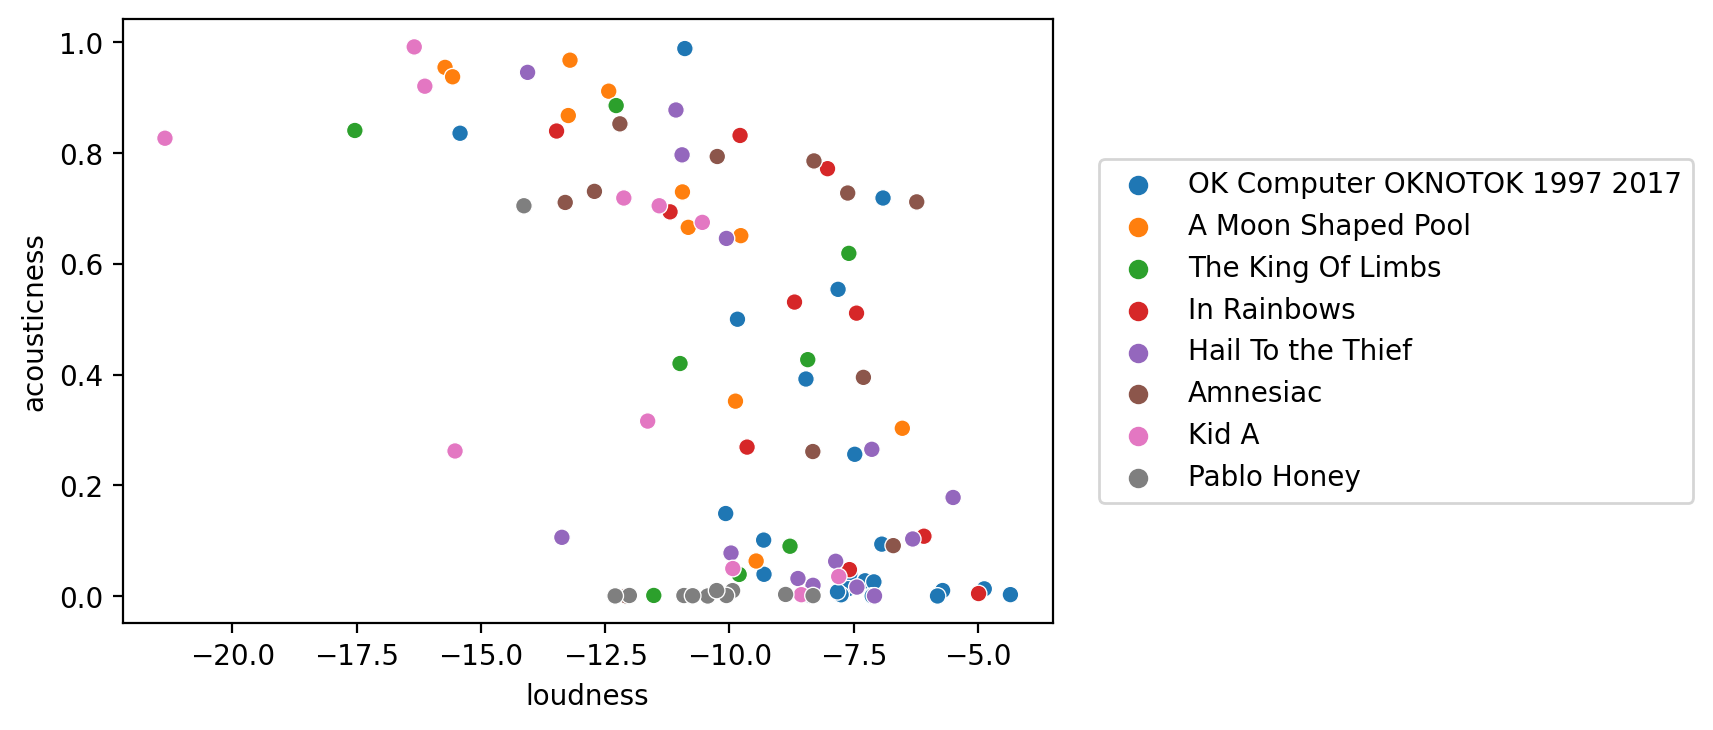

In [84]:
plt.figure(dpi=200)
sns.scatterplot(x='loudness',y='acousticness',data=data_features,hue=df['album_name'])
plt.legend(loc=(1.05,0.2))

### And now for Danceability (x-axis) to energy (y-axis). 
I would expect a strong coorelation here but we will see.

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

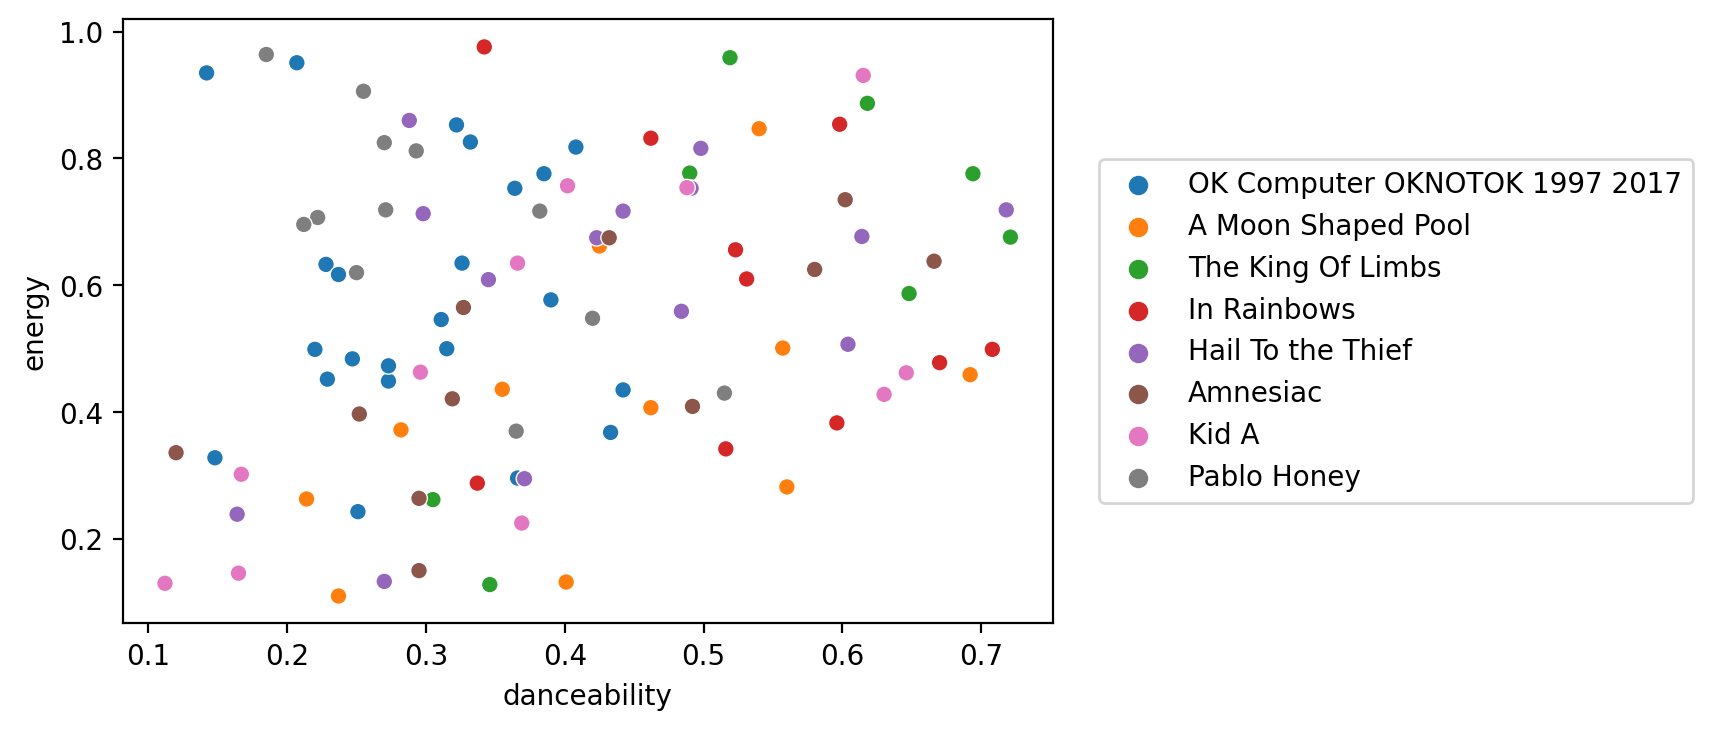

In [85]:
plt.figure(dpi=200)
sns.scatterplot(x='danceability',y='energy',data=data_features,hue=df['album_name'])
plt.legend(loc=(1.05,0.2))

### And tempo (x) to energy (y)
I'm just curious how those two features coorelate in general

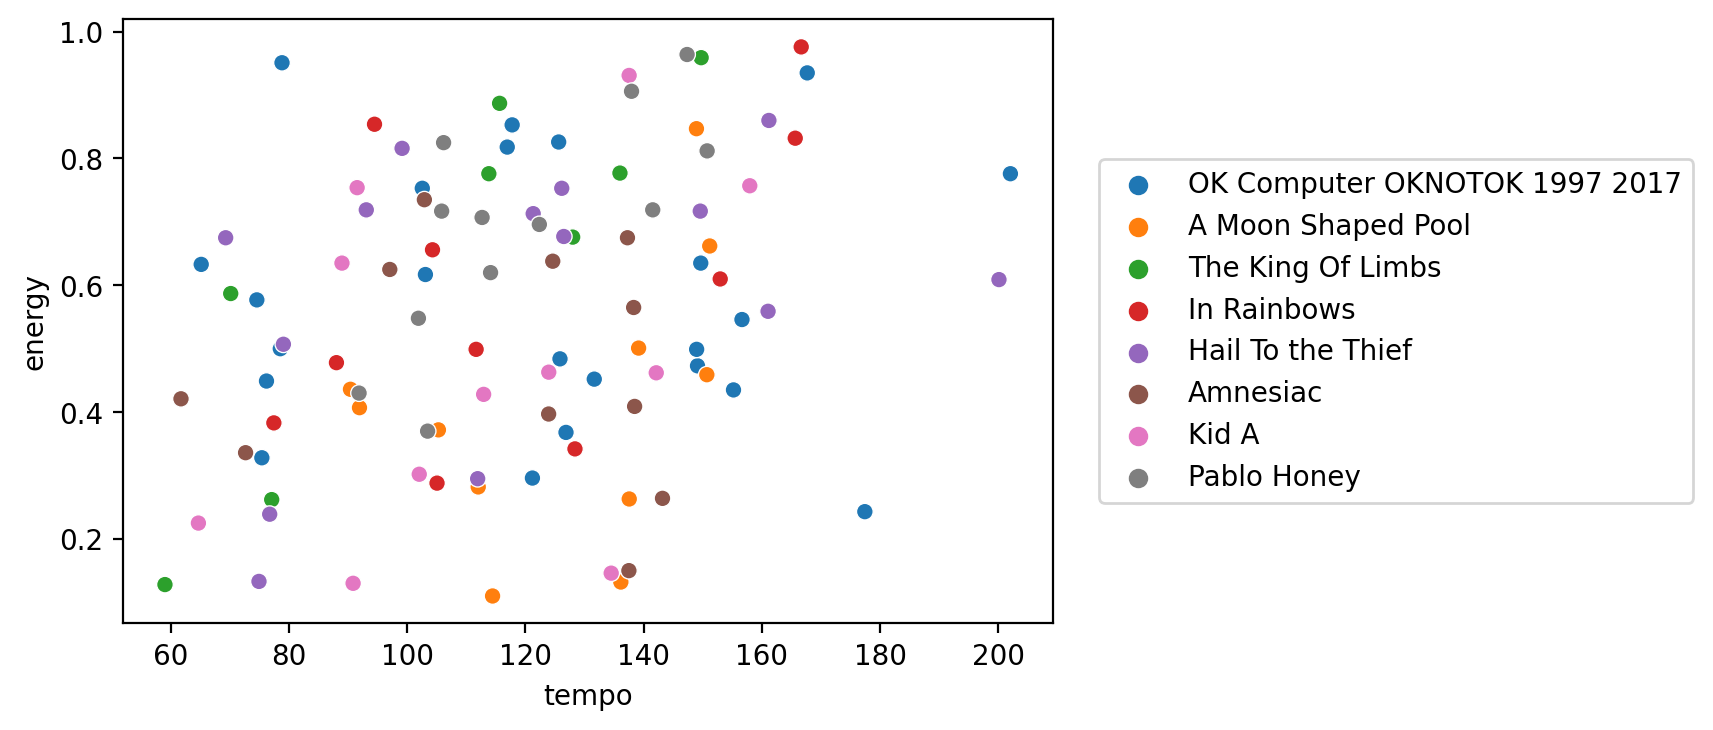

In [86]:
plt.figure(dpi=200)
sns.scatterplot(x='tempo',y='energy',data=data_features,hue=df['album_name'])
plt.legend(loc=(1.05,0.2))

# Calculating variance between songs by calculating their euclidean distance between all songs and finding the largest difference

### We will use scipy for this

In [50]:
import scipy

In [87]:
distances = scipy.spatial.distance.cdist(data_features, data_features, metric='euclidean')

In [88]:
distances.shape

(100, 100)

<AxesSubplot:>

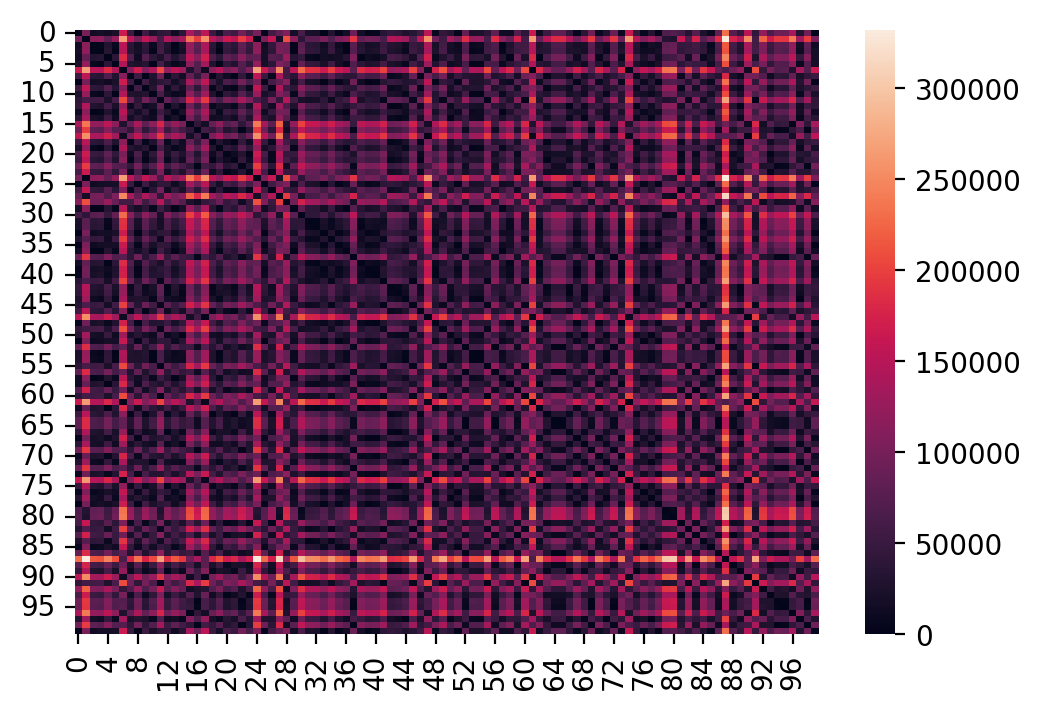

In [89]:
plt.figure(dpi=200)
sns.heatmap(distances)

In [90]:
df[distances==distances.max()][['album_name','track_name']]

,album_name,track_name
id,,
1Rd5OVjqDAr5xC96MHt448,A Moon Shaped Pool,Daydreaming
4aeCuOowYXJXrMZsVHZbfF,Kid A,Untitled


## So according to the spotify generated feature values, the Radiohead songs with the greatest range between them are "Daydreaming" from A Moon Shaped Pool and "Untitled" from Kid A.

Note that "Untitled" is the actual name of the outro track of "Motion Picture Soundtrack" from the Kid A album. It is a short instrumental track which for some reason Spotify has listed as the 11th and final song on the Kid A album.

## Lets take a peek at each songs feature values to see if any major differences stand out

In [91]:
untitled_features = sp.audio_features(tracks=['4aeCuOowYXJXrMZsVHZbfF'])

In [92]:
daydreaming_features = sp.audio_features(tracks=['1Rd5OVjqDAr5xC96MHt448'])

In [93]:
untitled_features

[{'danceability': 0.369,
  'energy': 0.225,
  'key': 7,
  'loudness': -16.341,
  'mode': 1,
  'speechiness': 0.0654,
  'acousticness': 0.992,
  'instrumentalness': 0.813,
  'liveness': 0.106,
  'valence': 0.0769,
  'tempo': 64.655,
  'type': 'audio_features',
  'id': '4aeCuOowYXJXrMZsVHZbfF',
  'uri': 'spotify:track:4aeCuOowYXJXrMZsVHZbfF',
  'track_href': 'https://api.spotify.com/v1/tracks/4aeCuOowYXJXrMZsVHZbfF',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4aeCuOowYXJXrMZsVHZbfF',
  'duration_ms': 52695,
  'time_signature': 3}]

In [94]:
daydreaming_features 

[{'danceability': 0.214,
  'energy': 0.263,
  'key': 9,
  'loudness': -13.207,
  'mode': 0,
  'speechiness': 0.0336,
  'acousticness': 0.968,
  'instrumentalness': 0.853,
  'liveness': 0.126,
  'valence': 0.113,
  'tempo': 137.561,
  'type': 'audio_features',
  'id': '1Rd5OVjqDAr5xC96MHt448',
  'uri': 'spotify:track:1Rd5OVjqDAr5xC96MHt448',
  'track_href': 'https://api.spotify.com/v1/tracks/1Rd5OVjqDAr5xC96MHt448',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1Rd5OVjqDAr5xC96MHt448',
  'duration_ms': 384439,
  'time_signature': 3}]

## Since "Untitled" is just a short outro track the duration might be one of the biggest factors to its feature score putting it at one end of the max range between songs.
We will remove song duration from the equation and try again.

In [98]:
no_time = data_features.drop(['duration_ms','time_signature'],axis=1)

In [99]:
distances = scipy.spatial.distance.cdist(no_time, no_time, metric='euclidean')

In [100]:
distances.max()

143.64930536835183

In [101]:
df[distances==distances.max()][['album_name','track_name']]

,album_name,track_name
id,,
4Dq6LgGObozz8ykRgYKIGn,OK Computer OKNOTOK 1997 2017,Meeting in the Aisle - Remastered
6ttYF5VadzTssGV2i1Q08T,The King Of Limbs,Codex


## Now that we removed song duration from the comparison, the songs which are the most different (according to the spotify generated feature values) is "Meeting in the Aisle" from OK Computer and "Codex" from King of Limbs.
I find it interesting that they are both instrumental tracks with no lyrics. Though there is definitely a big difference in tempo, these songs don't sound all that different to me compared to other Radiohead songs.  There is probably a bit more tuning with feature selection that needs to be done to get a real comparison.